# Energy System Model

Load python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load 3YP specific libraries

In [2]:
import Assets as AS
import EnergySystem as ES      
import Market as MK

Set parameters common to energy system

In [3]:
dt = 30/60 #1 minute time intervals
T = int(24/dt) #Number of intervals

Setup the assets

In [4]:
dispatchable = []
non_dispatchable = []
all_assets = []

#PV source
pv_capacity = 3 # kW
pv_site1 = AS.pvAsset(pv_capacity)
non_dispatchable.append(pv_site1)

#Load
nHouses = 1
load_site1 = AS.loadAsset(nHouses)
non_dispatchable.append(load_site1)

#Battery
battery_capacity = 2.5 # kWh
battery_power = 1 # kW
battery_site1 = AS.IdealBatteryAsset(battery_capacity, battery_power, dt, T)
dispatchable.append(battery_site1)

Setup and run energy system

In [5]:
# setup
energy_system = ES.EnergySystem(non_dispatchable, dispatchable, dt, T)
# run
net_load = energy_system.basic_energy_balance()

Setup and run the market

In [6]:
# setup
market1 = MK.marketObject()
# run
opCost = market1.getOpCost(net_load)

Display outputs

Operating cost: £ 0.403


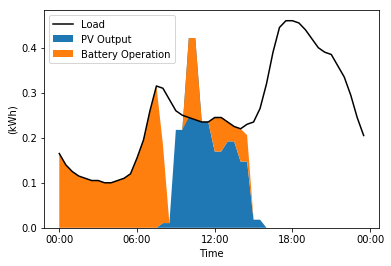

In [9]:
print('Operating cost: £ %3.3f'%(opCost/100))

labels = ['PV Output', 'Battery Operation']
ax = plt.subplot(1,1,1)
p1 = plt.stackplot(np.arange(48), pv_site1.output.T, battery_site1.output.T, labels=labels)
p2 = plt.plot(load_site1.output, '-k', label='Load')
plt.xticks([0, 12, 24, 36, 48])
ax.set_xticklabels(['00:00','06:00','12:00','18:00','00:00'])
plt.ylabel('(kWh)', color='k')
plt.xlabel('Time', color='k')
ax.legend()
plt.show()